# Libraries

In [19]:
import numpy as np
from scipy import stats #scipy is the library; stats is the module within the library
from scipy.stats import norm, expon, binom, poisson
import math
import pandas as pd

#images
from IPython.display import Image

#visualization
import seaborn as sns
sns.set_style('darkgrid')

from matplotlib import pyplot as plt #matplotlib is the library, and pyplot is the module
%matplotlib inline

---
# Sec 2.14 - Mean, Median, Mode

### MEAN & MEDIAN

Creating fake income data with:\
center (mean) = 27000\
sd = 15000\
10000 data point

In [177]:
np.random.seed(42)

incomes = np.random.normal(27000, 15000, 10000)
incomes

array([34450.71229517, 24926.03548243, 36715.32807151, ...,
       16420.24914126, 34436.48359523, 36665.82680307])

/Users/oz/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


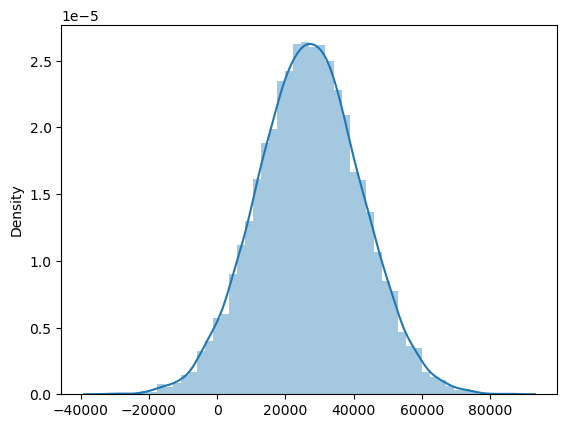

In [178]:
sns.distplot(incomes);

In [179]:
print('mean income:  ', np.mean(incomes), 
      '\nmedian income:', np.median(incomes),
      '\nmax income:   ', np.max(incomes), 
      '\nmin income:   ', np.min(incomes),
      '\n25th percentile:', np.percentile(incomes, 25), #added percentile to see if these values change
      '\n75th percentile:', np.percentile(incomes, 75))

mean income:   26967.960249473606 
median income: 26961.075363106836 
max income:    85893.56559654491 
min income:    -31836.003774275137 
25th percentile: 16911.14204989346 
75th percentile: 37066.21331796999


Let's compare the above to when we add someone with an extremely high income to the dataset ($100,000,000)\
Understand that when talking about mean, its important to know if there are any outliers.\
If there are outliers, then median might be a better statistic

In [181]:
incomes = np.append(incomes, [1000000000])
print('mean income:  ', np.mean(incomes), 
      '\nmedian income:', np.median(incomes),
      '\nmax income:   ', np.max(incomes), 
      '\nmin income:   ', np.min(incomes),
      '\n25th percentile:', np.percentile(incomes, 25),
      '\n75th percentile:', np.percentile(incomes, 75))

mean income:   126955.2647230013 
median income: 26963.942386217193 
max income:    1000000000.0 
min income:    -31836.003774275137 
25th percentile: 16912.716059904957 
75th percentile: 37069.0520505803


Above we can see how the mean chanaged due to that one massive outlier, which isn't exactly representative of the population

### MODE

Let's create fake ages for 500 people, between 18 and 90 years old.

[69 32 89 78 38 41 20 39 70 19 47 55 19 81 77 38 50 75 39 66 76 59 77 32
 79 79 64 79 68 72 81 20 68 24 38 56 35 21 77 31 26 70 19 77 88 61 25 64
 52 53 67 21 19 23 71 21 71 80 35 61 51 79 31 65 32 89 79 57 70 41 43 77
 58 46 32 62 82 88 26 18 25 80 28 25 52 52 50 22 58 45 24 89 29 51 50 65
 40 79 54 61 52 82 64 20 18 22 31 44 26 32 59 68 80 69 21 40 32 60 46 53
 30 49 88 76 45 83 59 62 79 74 23 45 45 61 47 79 79 18 44 79 20 87 89 44
 26 79 54 68 61 41 76 49 69 79 75 69 29 56 19 20 73 76 19 19 71 18 36 19
 70 61 49 87 49 85 72 73 34 55 41 86 87 28 33 76 87 20 37 76 53 36 84 36
 37 88 69 50 57 56 18 28 74 67 40 48 59 24 33 77 19 18 65 29 86 54 49 26
 36 65 20 37 41 71 50 41 89 53 55 42 35 83 71 52 78 58 50 85 50 31 38 65
 37 25 24 84 34 50 65 76 39 47 55 68 71 25 44 44 38 47 45 81 86 78 65 36
 21 52 81 66 34 61 47 63 23 54 41 63 70 77 80 49 50 84 35 42 71 75 84 63
 41 49 64 40 83 44 19 34 50 26 60 65 56 59 43 67 42 41 30 77 24 74 53 62
 37 82 25 33 31 32 83 49 80 68 42 75 80 79 39 75 75

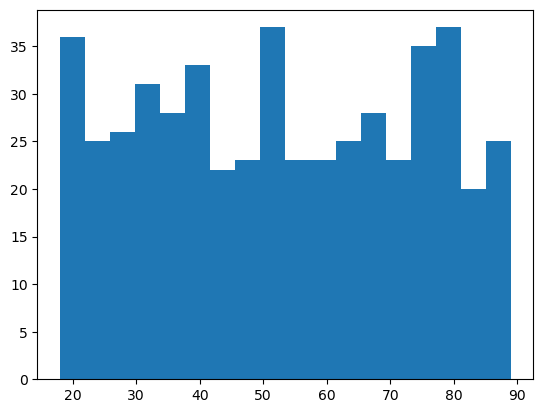

In [173]:
np.random.seed(42)

ages = np.random.randint(18, 90, size=500)
print(ages)
plt.hist(ages, 18);

In [174]:
stats.mode(ages)

ModeResult(mode=array([79]), count=array([17]))

So in the above dataset, the age 79 appears 17 times. So the mode is 34.

---
# Sec 2.15 - Variance & Standard Deviation

### VARIANCE ($\sigma^{2}$)

Measures how spread out the dataset is.\
Average of the squared differences from the mean
- First find the mean ($\mu$)
- then find the differnces (data point - mean)
- sqare the differences
- Find average of squared diff (sum squared diff and divide by number of data points)

**This gives weight to outliers**

### STANDARD DEVIATION ($\sigma$)

Squre root of variance\
**Helps identify outliers.** Points that lie more than one standard deviations from the mean can be considered unusual.\
Can talk about how extreme a data point is by talking about 'how many sigmas' away from the mean it is

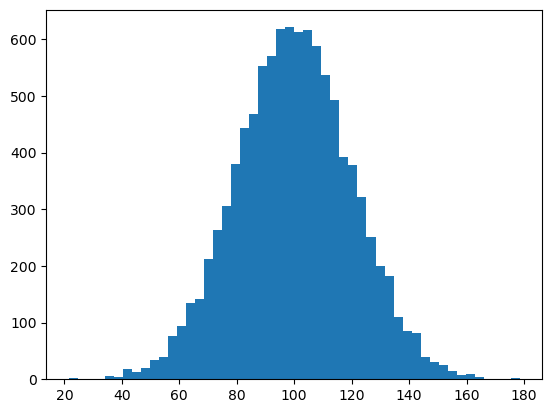

In [193]:
np.random.seed(42)

incomes_0215 = np.random.normal(100.0, 20.0, 10000) #center, sd, size

plt.hist(incomes_0215, 50); #bins

In [14]:
#STANDARD DEVIATION of numpy array. Can call functions on them

incomes_0215.std()

20.06824412259975

In [16]:
#VARIANCE of numpy array. 
#standard deviation squared

incomes_0215.var()

402.73442216425946

### SAMPLE VARIANCE (*S*$^{2}$)

If working with sample, instead of entire dataset:
- divide the sum of squared diff by **N-1** (N = number of samples)

---
# Sec 2.16 - Probabily Density/Mass Functions

### PROBABILITY DENSITY FUNCITON (pdf)

#### For **Continuous Data**

Probability of data point falling within some given range of a given value
- Between 0 & 1 sd ($\sigma$) = 68.2%
- Between 1 & 2 $\sigma$ = 27.2%
- Between 2 & 3 $\sigma$ = 4.2%
- \> 3 $\sigma$ from the mean = .2%

![Probability Distribution Function](img/probability_distribution_function_graph.png)

### PROBABILITY MASS FUNCTION (pmf)

#### For **Discrete Data**

![probability mass function](img/probability_mass_function_graph.png)

Here we say: the probabiliy of 3 occuring is 30%

It's basically a histogram.

---
# Sec 2.17 - Common Data Distributions

### UNIFORM DISTRIBUTION

Every value has almost an equal probabily of appearing

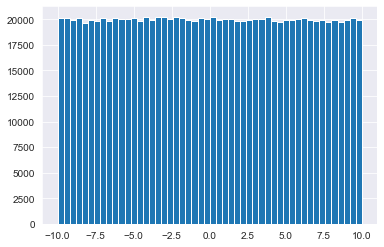

In [49]:
values_217 = np.random.uniform(-10.0,10.0, 1000000)
plt.hist(values_217, 50);

### NORMAL/GAUSSIAN

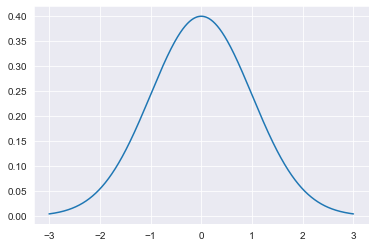

In [50]:
x = np.arange(-3, 3, 0.001) #range of values bw -3 and 3, step (or spacing) of 0.001
plt.plot(x, norm.pdf(x));

### EXPONENTIAL PDF / "POWER LAW"

Data set where you see an exponential fall off

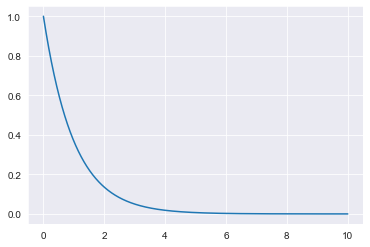

In [60]:
x = np.arange(0, 10, 0.001)
plt.plot(x, expon.pdf(x));

### BINOMIAL PROBABILITY MASS FUNCTION

Oz- Not familiar with this. I don't rmr doing this during the bootcamp. But it's in the Udemy course.

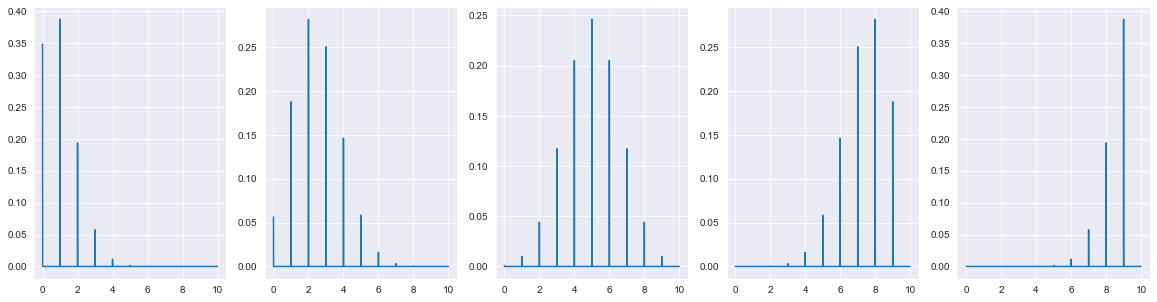

In [76]:
n, p = 10, 0.1
n, q = 10, 0.25
n, r = 10, 0.5
n, s = 10, 0.75
n, t = 10, 0.9
x = np.arange(0, 10, 0.001)

fig, ax = plt.subplots(1, 5, figsize=(20,5)) #rows, cols; figsize(len, height)
ax[0].plot(x, binom.pmf(x, n, p))
ax[1].plot(x, binom.pmf(x, n, q))
ax[2].plot(x, binom.pmf(x, n, r))
ax[3].plot(x, binom.pmf(x, n, s))
ax[4].plot(x, binom.pmf(x, n, t));

### POISSON PMF

Example: My website gets on average 500 visits per day, what's the odds of getting 550 on a given day?

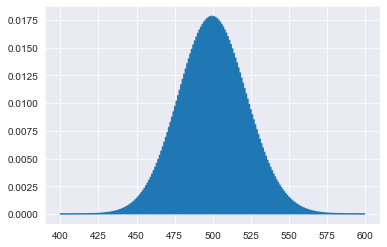

In [86]:
mu = 500 #mean
x = np.arange(400, 600, 0.5) #start, stop, step
plt.plot(x, poisson.pmf(x, mu));

In [87]:
x = poisson.pmf(550,mu)
x

0.0015115070495210661

This above doesn't make sense. So the chance of getting 550 visitors is 0.15%?? That's insane... given that the website averages 500 visits per day

---
# 2.18- Percentiles & Moments

### PERCENTILE

The X% where the rest of the values is below that point.

min val: -1.9612001258091711 
max val: 1.9631188532181634 
10%: -0.6461494801551415 
25%: -0.3362952650035512 
50%: -0.0012974878964387704 
90%: 0.6406395838355297 
99%: 1.1624151013170347 



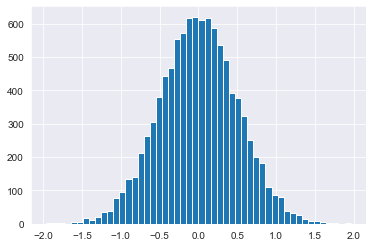

In [116]:
np.random.seed(42)

vals_218 = np.random.normal(0, 0.5, 10000) #mean, sd, amount of data points
# vals_218
print('min val:', np.min(vals_218),
      '\nmax val:', np.max(vals_218),
      '\n10%:', np.percentile(vals_218,10),
      '\n25%:', np.percentile(vals_218, 25),
      '\n50%:', np.percentile(vals_218, 50),
      '\n90%:', np.percentile(vals_218, 90),
      '\n99%:', np.percentile(vals_218, 99), '\n')
plt.hist(vals_218, 50);

### MOMENTS

Quantitative measure of the **shape** of the pdf. The equation is complicated, but its like taking a derivative

1st moment = mean\
2nd moment = variance\
3rd moment = skew
- how lopsided is the distribution?
- longer tail on the left = negative skew
- longer tail on the right = positive skew

4th moment = kurtosis
- how thick is the tail, and how sharp is the peak, compared to a normal dist.
- ex: higher peaks have higher kurtosis

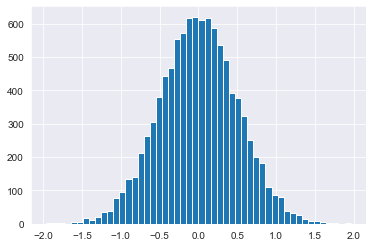

In [117]:
plt.hist(vals_218, 50);

#### 1st moment- mean

In [118]:
np.mean(vals_218)

-0.0010679916842131034

#### 2nd moment- variance

In [119]:
np.var(vals_218) #square standard deviation (since var is square root of sd)

0.25170901385266214

#### 3rd moment- skew

Describes the lopsidedness.\
For normal dist, it should be almost 0

In [127]:
stats.skew(vals_218)

0.001963697766356243

#### 4th moment- kurtosis

Describes shape of tail and peak.\
For normal dist, this should be 0

In [126]:
stats.kurtosis(vals_218)

0.026479272360444117

---
# 2.19 Matplotlib

### DRAWING A LINE GRAPH

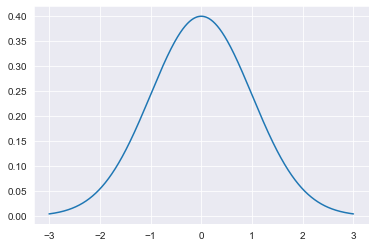

In [38]:
x = np.arange(-3, 3, 0.001)

plt.plot(x, norm.pdf(x));

### MULTIPLE PLOTS ON ONE GRAPH

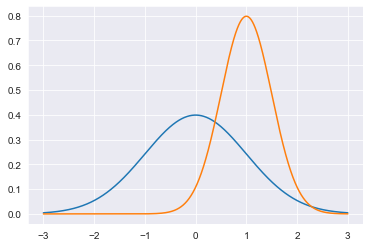

In [5]:
plt.plot(x, norm.pdf(x))
plt.plot(x, norm.pdf(x, 1.0, 0.5)); #mean = 1.0; std = 0.5

### SAVING TO FILE

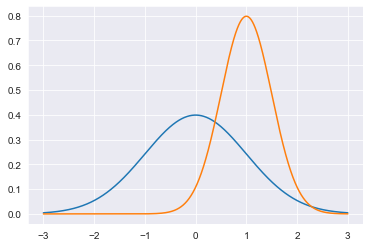

In [8]:
plt.plot(x, norm.pdf(x))
plt.plot(x, norm.pdf(x, 1.0, 0.5))
plt.savefig('img/s2_19_matplotlib_savefig.png')

### ADJUST THE AXES

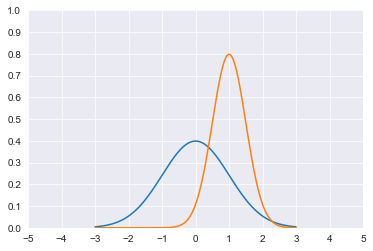

In [43]:
axes = plt.axes()
axes.set_xlim([-5, 5])
axes.set_ylim([0, 1.0])
axes.set_xticks(np.arange(-5, 6, 1))
axes.set_yticks(np.arange(0, 1.1, 0.1))

plt.plot(x, norm.pdf(x))
plt.plot(x, norm.pdf(x, 1.0, 0.5));

### CHANGE LINE TYPES AND COLORS

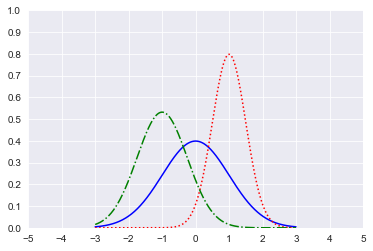

In [89]:
axes = plt.axes()
axes.set_xlim([-5, 5])
axes.set_ylim([0, 1.0])
axes.set_xticks(np.arange(-5, 6, 1))
axes.set_yticks(np.arange(0, 1.1, 0.1))

plt.plot(x, norm.pdf(x), 'b-') #need quotations. b : blue. - : line
plt.plot(x, norm.pdf(x, 1.0, 0.5), 'r:') #r : red
plt.plot(x, norm.pdf(x, -1, 0.75), 'g-.');

### LABELING AXES & ADDING LEGEND

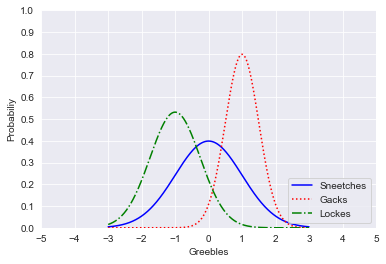

In [90]:
axes = plt.axes()
axes.set_xlim([-5, 5])
axes.set_ylim([0, 1.0])
axes.set_xticks(np.arange(-5, 6, 1))
axes.set_yticks(np.arange(0, 1.1, 0.1))

plt.plot(x, norm.pdf(x), 'b-') #need quotations. b : blue. - : line
plt.plot(x, norm.pdf(x, 1.0, 0.5), 'r:') #r : red
plt.plot(x, norm.pdf(x, -1, 0.75), 'g-.');

plt.xlabel('Greebles')
plt.ylabel('Probabiliy')
plt.legend(['Sneetches', 'Gacks', 'Lockes'], loc=4);

### XKCD Style

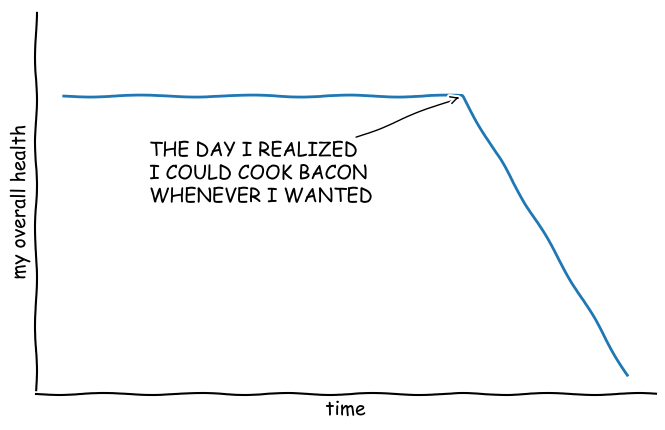

In [145]:
plt.rcdefaults() # to remove the dark_grid seaborn style set under libraries
plt.xkcd()

fig, ax = plt.subplots(1,1, figsize=[8,5])

# remove the top and right lines; so only the x and y axis appear
ax.spines['top'].set_color('none')
ax.spines['right'].set_color('none')

# remove x & y ticks
plt.xticks([])
plt.yticks([])

# set the y axis between -30 & 10. The line will go across y = 1, and then go down from there until y = -30
ax.set_ylim(-30, 10)

# now lets set the graph (this is where the line will go across y = one)
data = np.ones(100)
data[70:] -= np.arange(30)

# let's fucking annotate
plt.annotate('THE DAY I REALIZED\nI COULD COOK BACON\nWHENEVER I WANTED',
            xy=(70, 1), arrowprops=dict(arrowstyle='->'), xytext=(15, -10))

plt.plot(data)

plt.xlabel('time')
plt.ylabel('my overall health');

### PIE CHART

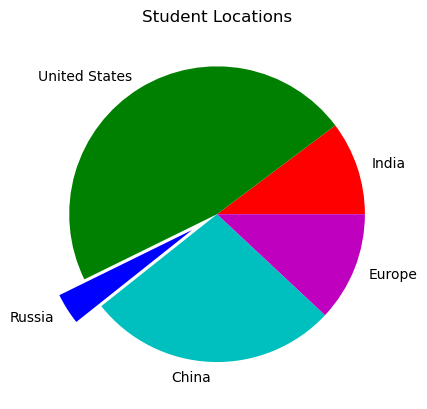

In [154]:
plt.rcdefaults()

values = [12, 55, 4, 32, 14]
colors = ['r', 'g', 'b', 'c', 'm']
explode = [0, 0, 0.2, 0, 0]

labels = ['India', 'United States', 'Russia', 'China', 'Europe']

plt.pie(values, colors=colors, labels=labels, explode=explode)

plt.title('Student Locations');

### BAR CHARTS

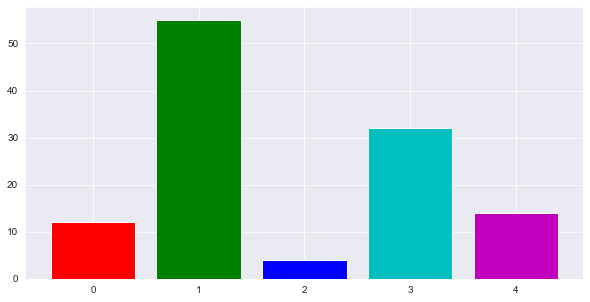

In [130]:
values = [12, 55, 4, 32, 14]
colors = ['r', 'g', 'b', 'c', 'm']

plt.figure(figsize = (10,5))

plt.bar(range(0,5), values, color=colors);

### SCATTER PLOT

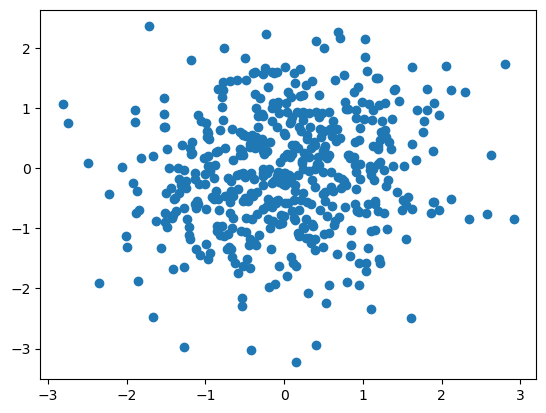

In [187]:
X = np.random.randn(500) # random samples from a normal distribution
Y = np.random.randn(500)

plt.scatter(X,Y);

### HISTOGRAM

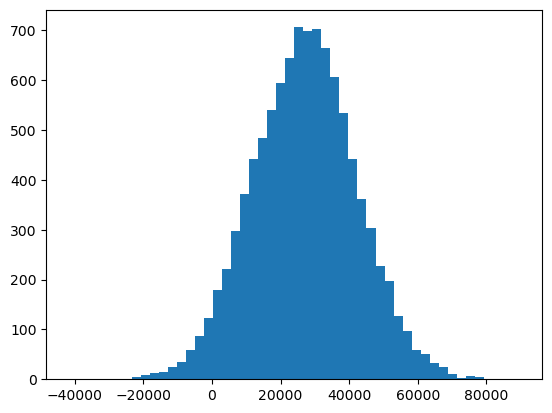

In [168]:
incomes = np.random.normal(27000, 15000, 10000)

plt.hist(incomes, 50);

### BOX & WHISKER PLOT

Visualize the spreads and skew of data

The red line = median of data

Box = represents the bounds of the 1st (*25th percentile*) and 3rd quartiles (*75th percentile*) (50% of the data)

the dotted-line 'whiskers' indicate the range of the data, except outliers, which are plotted outside the whiskers. Outliers are 1.5x or more the interquartile range (the size of the box)

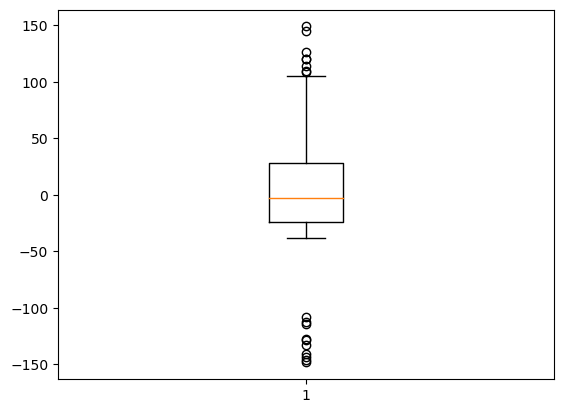

In [176]:
a = np.random.rand(100) * 100 - 40
high_outliers = np.random.rand(10) * 50 + 100
low_outliers = np.random.rand(10) * -50 - 100

data = np.concatenate((a, high_outliers, low_outliers))

plt.boxplot(data);

### ACTIVITY

In [192]:
age = np.random.rand(50) * 100
age

array([15.54011287, 64.97907275,  8.41100993, 18.13258561, 47.5796815 ,
       65.35651527, 14.5869127 , 18.52233308, 20.44463671, 23.87008047,
       22.65538485, 39.51491085, 65.37896508, 43.80317831, 77.59739087,
       71.92685059, 12.6526914 ,  4.88416233, 87.7941564 ,  7.98310666,
       14.83391807,  2.21332756, 62.83363653, 58.23705632, 98.69036664,
       88.69323963, 41.08431775, 37.15858409, 29.68520343, 15.240692  ,
       13.80836566, 13.2283708 , 11.41147572, 24.05120424, 30.66686303,
       96.1578971 , 57.8473251 , 98.75957745, 37.24669478, 45.76266326,
       32.45786592, 18.28876509, 14.31647078, 94.50791978, 98.68106818,
        4.49094965, 15.03458747, 42.35240923, 18.63334763, 36.38803936])

In [185]:
age = np.arange(0, 100, 1)
age

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
       51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67,
       68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84,
       85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99])

In [195]:
np.random.randint(0,100)

80

In [198]:
age = [np.random.randint(0,100) for x in range(0,100)]
age

[30,
 52,
 33,
 37,
 56,
 3,
 1,
 11,
 34,
 69,
 71,
 20,
 60,
 34,
 47,
 14,
 70,
 14,
 5,
 80,
 67,
 21,
 31,
 21,
 26,
 14,
 43,
 85,
 91,
 8,
 33,
 99,
 72,
 14,
 61,
 44,
 83,
 71,
 57,
 91,
 18,
 15,
 74,
 7,
 32,
 73,
 17,
 34,
 42,
 49,
 2,
 90,
 58,
 27,
 45,
 63,
 69,
 46,
 13,
 6,
 73,
 78,
 30,
 92,
 80,
 50,
 28,
 14,
 89,
 75,
 24,
 60,
 40,
 68,
 3,
 56,
 30,
 2,
 66,
 89,
 49,
 16,
 59,
 73,
 65,
 87,
 74,
 23,
 98,
 86,
 31,
 86,
 97,
 18,
 65,
 59,
 65,
 14,
 84,
 34]

# 2.20- Seaborn

Importing data and plotting in matplotlib:

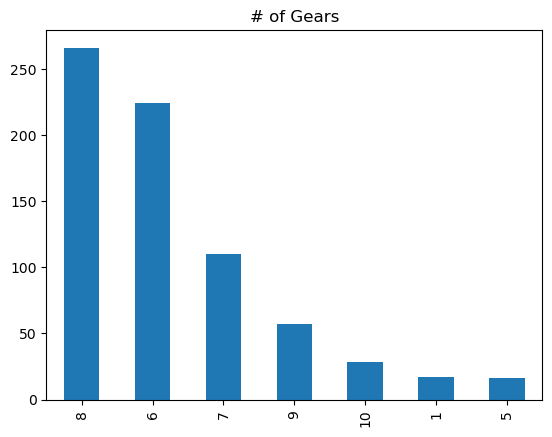

In [18]:
df = pd.read_csv("http://media.sundog-soft.com/SelfDriving/FuelEfficiency.csv")

# columns: 'Mfr Name', 'Carline', 'Eng Displ', 'Cylinders', 'Transmission', 'CityMPG', 'HwyMPG', 'CombMPG', '# Gears'

gear_counts = df['# Gears'].value_counts()

gear_counts.plot(kind='bar', title='# of Gears');

Compared to Seaborn below:

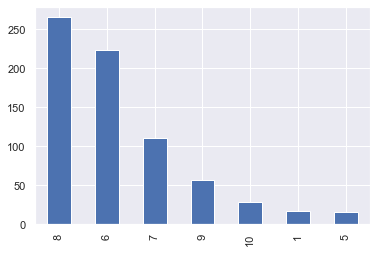

In [22]:
sns.set()

gear_counts.plot(kind='bar');

In [23]:
df.head()

,Mfr Name,Carline,Eng Displ,Cylinders,Transmission,CityMPG,HwyMPG,CombMPG,# Gears
0,aston martin,Vantage V8,4.0,8,Auto(S8),18,25,21,8
1,Volkswagen Group of,Chiron,8.0,16,Auto(AM-S7),9,14,11,7
2,General Motors,CORVETTE,6.2,8,Auto(S8),12,20,15,8
3,General Motors,CORVETTE,6.2,8,Auto(S8),15,25,18,8
4,General Motors,CORVETTE,6.2,8,Auto(S8),14,23,17,8


### DISTPLOT

Basically a histogram with a smooth distribution of that histogram overlaid on it

/Users/oz/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


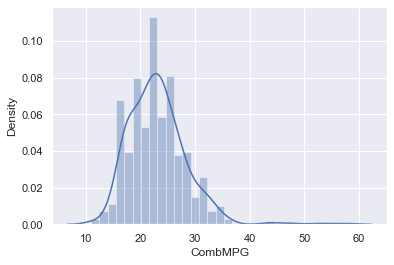

In [24]:
sns.distplot(df['CombMPG']); # number of times CombMPG appears

### PAIR PLOT

Let's you visualize plots of every combination of various attributes together. So you can look at interesting patterns between features.

Example: Let's classify cars by engine cylinders, and look for relationship between cylinders, city MPG rating, highway MPG rating, and combined MPG rating:

In [26]:
df2 = df[['Cylinders', 'CityMPG', 'HwyMPG', 'CombMPG']]
df2.head()

,Cylinders,CityMPG,HwyMPG,CombMPG
0,8,18,25,21
1,16,9,14,11
2,8,12,20,15
3,8,15,25,18
4,8,14,23,17


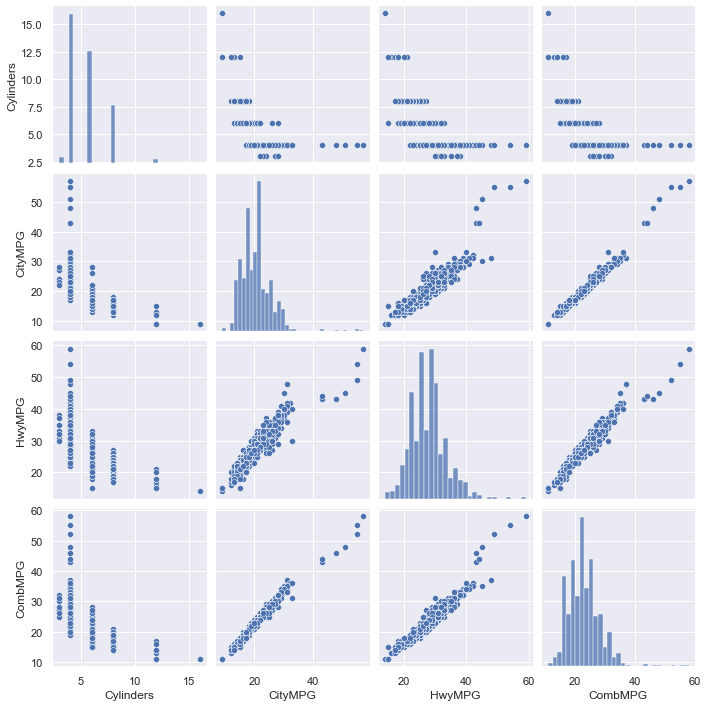

In [32]:
sns.pairplot(df2, height=2.5);

### SCATTER PLOT

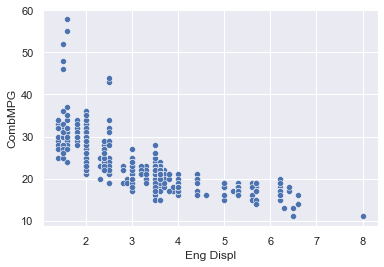

In [34]:
sns.scatterplot(x='Eng Displ', y='CombMPG', data=df);

Here we see that the bigger the engine displacement, the lower the combined MPG

### JOINT PLOT

Visualize the scatterplot and histogram at the same time

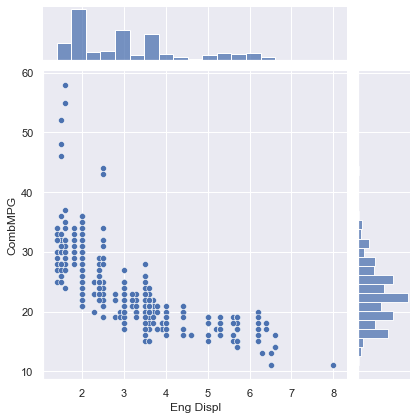

In [36]:
sns.jointplot(x='Eng Displ', y='CombMPG', data=df);

Here we can see that the most common engine displacement is around 2 liter, and the most common 